In [10]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime, timedelta
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [11]:
df = pd.read_csv("us-counties.csv")

df['date'] = pd.to_datetime(df['date'])

#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [12]:
df_total = df.groupby(['county', 'state'], as_index = False).max()
topcounties = df_total.sort_values(by='cases', ascending = False).head(10)
topcounties

,county,state,date,fips,cases,deaths
1756,Los Angeles,California,2021-10-03,6037.0,1463743,26153.0
2115,New York City,New York,2021-10-03,NaN,1085590,34284.0
1830,Maricopa,Arizona,2021-10-03,4013.0,700319,11558.0
1958,Miami-Dade,Florida,2021-10-03,12086.0,661638,8504.0
650,Cook,Illinois,2021-10-03,17031.0,620602,11603.0
1241,Harris,Texas,2021-10-03,48201.0,558618,8414.0
736,Dallas,Texas,2021-10-03,48113.0,389318,4931.0
2561,San Diego,California,2021-10-03,6073.0,373289,4078.0
2490,Riverside,California,2021-10-03,6065.0,363950,5004.0
2560,San Bernardino,California,2021-10-03,6071.0,351963,5545.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [13]:
df_total2 = df.groupby(['state']).max()
df_total2.sort_values(by='cases', ascending=False).head(5)

,date,county,fips,cases,deaths
state,,,,,
California,2021-10-03,Yuba,6115.0,1463743,26153.0
New York,2021-10-03,Yates,36123.0,1085590,34284.0
Arizona,2021-10-03,Yuma,4027.0,700319,11558.0
Florida,2021-10-03,Washington,12133.0,661638,11799.0
Illinois,2021-10-03,Woodford,17203.0,620602,11603.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [14]:
df2 = df[(df['county'].isin(topcounties['county'])) & (df['state'].isin(topcounties['state']))]
#df2 = df2.drop(['fips', 'deaths'], axis=1)
df2 = df2.set_index(['county','date'])

In [15]:
def calc_incidence_index(row, df):
    prev_index = (row.name[0], pd.to_datetime(row.name[1]) - pd.offsets.Day(1))
    if prev_index in df.index: 
        return row['cases'] - df.loc[prev_index]['cases']
    else:
        return 0
    
df2['incidences'] = df2.apply(lambda x: calc_incidence_index(x, df2),axis=1)
df2.sort_values('incidences', ascending = False).head(10)

state     fips   cases   deaths  incidences
county      date                                                        
Los Angeles 2020-12-26  California   6037.0  706712   9438.0       29174
            2020-12-16  California   6037.0  566185   8568.0       22236
Miami-Dade  2021-08-13     Florida  12086.0  583845   6472.0       21655
            2021-08-20     Florida  12086.0  603878   6472.0       20033
Los Angeles 2021-01-01  California   6037.0  790895  10552.0       19980
Miami-Dade  2021-08-06     Florida  12086.0  562190   6472.0       19709
Los Angeles 2021-01-07  California   6037.0  871749  11545.0       19239
            2021-01-08  California   6037.0  889787  11863.0       18038
            2021-01-14  California   6037.0  975693  13234.0       16802
            2021-01-09  California   6037.0  906554  12084.0       16767

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [16]:
df2 = df2.reset_index()
df3 = df2.iloc[df2.groupby('county')['incidences'].idxmax()]
df3 = df3.set_index('county')
df3.sort_values('incidences', ascending = False)

#df2.groupby(['county']).max().sort_values('incidences', ascending = False)

#df2.reset_index()
#df3 = df2.groupby(['county']).max()
#df3.sort_values('incidences', ascending = False)

,date,state,fips,cases,deaths,incidences
county,,,,,,
Los Angeles,2020-12-26,California,6037.0,706712,9438.0,29174
Miami-Dade,2021-08-13,Florida,12086.0,583845,6472.0,21655
New York City,2021-03-24,New York,NaN,816580,30793.0,16715
San Diego,2021-07-01,California,6073.0,298015,3780.0,15453
Harris,2020-09-21,Texas,48201.0,137946,2505.0,14129
Maricopa,2021-01-03,Arizona,4013.0,342994,5239.0,11761
Riverside,2021-01-12,California,6065.0,227827,2294.0,8341
San Bernardino,2020-12-16,California,6071.0,137548,1304.0,8026
Cook,2020-11-01,Illinois,17031.0,193102,5500.0,6697


#### Question 5: Plot an incidence curve for the County with the highest peak.

Text(0, 0.5, 'Incidences')

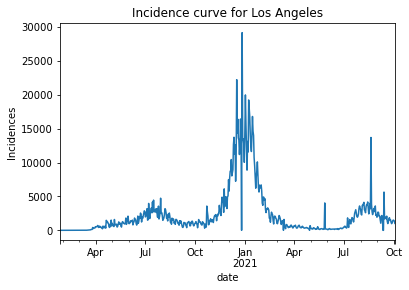

In [17]:
df2 = df2.set_index(['county', 'date'])
ax1 = df2.loc["Los Angeles"]['incidences'].plot(title = "Incidence curve for Los Angeles")
ax1.set_ylabel("Incidences")

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

Text(0, 0.5, 'Incidences')

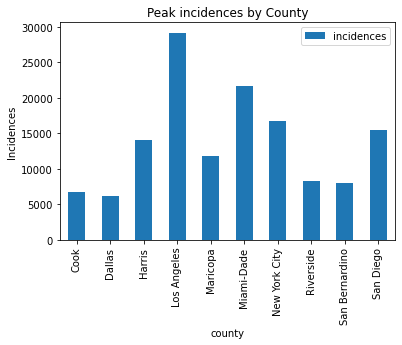

In [18]:
df3 = df3.reset_index()
df3 = df3.set_index('county')
df4 = df3[['incidences']].plot.bar(title = "Peak incidences by County")
df4.set_ylabel("Incidences")